# Heart Disease

### Step-1: Load all usefull libraries

In [1]:
# basic libraries 
import pandas as pd 
import numpy as np

# plotting libraries
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# sklearn for label encoding
import sklearn as sl
import itertools
print("Setup Completed")


Setup Completed


### load all data 

In [2]:
file = ("/home/dp/Documents/Heart disease prediction/Heart_Disease_Prediction.csv") #file path
df = pd.read_csv(file) # load csv file 

In [3]:
df.head(15) # statisical data view

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [4]:
df.columns # no. of attributes in dataset

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [5]:
df.describe() #statistical data analysis

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df.info() #dataset basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### convert Heart Disease data from object to binary digits using LabelEncoder.

In [7]:
# LabelEncoder is used to convert values into binary
from sklearn.preprocessing import LabelEncoder  
label_encoder= LabelEncoder()  
# Heart Disease column has type object so it is converted to binary value using LabelEncoder  
df['Heart Disease']= label_encoder.fit_transform(df['Heart Disease'])
df['Heart Disease']

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [8]:
df.isna().sum() # isna().sum() checks sum of total null values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
df.duplicated().sum() # check duplicate values

0

# Implementing KNN, SVM, Random Forest Algorithms

In [10]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [11]:
# defining features and predict variables from dataset
feature = df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']]

predict = df['Heart Disease']

feature.shape,predict.shape

((270, 13), (270,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(feature)
print(scaled)

[[ 1.71209356  0.6894997   0.87092765 ...  0.67641928  2.47268219
  -0.87570581]
 [ 1.38213977 -1.45032695 -0.18355874 ...  0.67641928 -0.71153494
   1.18927733]
 [ 0.2822938   0.6894997  -1.23804513 ... -0.95423434 -0.71153494
   1.18927733]
 ...
 [ 0.1723092  -1.45032695 -1.23804513 ...  0.67641928 -0.71153494
  -0.87570581]
 [ 0.2822938   0.6894997   0.87092765 ...  0.67641928 -0.71153494
   0.67303154]
 [ 1.38213977  0.6894997   0.87092765 ...  0.67641928  2.47268219
  -0.87570581]]


In [13]:
# splitting training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled,predict,test_size=0.3,random_state=30)

# KNN algorithm

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
grid_params_knn = { 'n_neighbors' : list(range(1,100)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [16]:
gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params_knn, verbose = 1, cv=3, n_jobs = -1)


In [17]:
# fit the model on our train set
g_res_knn = gs_knn.fit(x_train, y_train)

Fitting 3 folds for each of 594 candidates, totalling 1782 fits


In [18]:
g_res_knn.best_score_

0.851851851851852

In [19]:
g_res_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}

In [20]:
#fitting KNN classifier in training dataset
knn= KNeighborsClassifier(n_neighbors = 11, metric='minkowski',weights='distance')
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [21]:
# get a prediction
y_pred = knn.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
print ('               Classification report of KNN Algorithm ')
print ('               -------------------------------------- ')
print(classification_report(y_test, y_pred))

               Classification report of KNN Algorithm 
               -------------------------------------- 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.83      0.77      0.80        31

    accuracy                           0.85        81
   macro avg       0.85      0.84      0.84        81
weighted avg       0.85      0.85      0.85        81



Text(0.5, 1.0, 'Confusion matrix for KNN Algorithm')

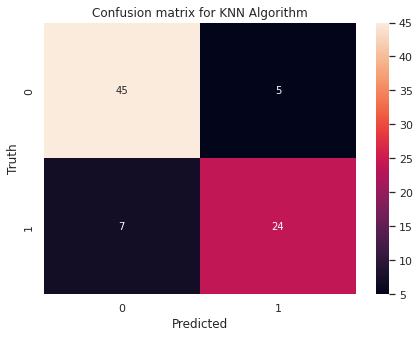

In [23]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

# heatmap of confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for KNN Algorithm")

# SVM (Support Vector Machines) Algorithm

In [24]:
from sklearn.svm import SVC  

In [25]:
mdl = SVC(kernel='linear',C=1) # Linear Kernel other parameters are by default C − float, optional, default = 1.0, gamma − {‘scale’, ‘auto’} or float  
mdl.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [26]:
y_pred_svm = mdl.predict(x_test)  

In [27]:
print ('               Classification report of SVM Algorithm ')
print ('               -------------------------------------- ')
print(classification_report(y_test, y_pred_svm))

               Classification report of SVM Algorithm 
               -------------------------------------- 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.84      0.87      0.86        31

    accuracy                           0.89        81
   macro avg       0.88      0.89      0.88        81
weighted avg       0.89      0.89      0.89        81



Text(0.5, 1.0, 'Confusion matrix for SVM Algorithm')

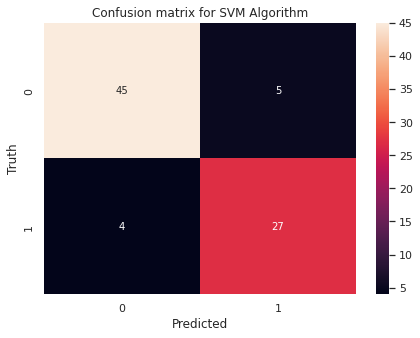

In [28]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_svm= confusion_matrix(y_test, y_pred_svm) 

# heatmap of confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for SVM Algorithm")

# Random Forest Algorithm

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
 from sklearn.ensemble import RandomForestClassifier


In [31]:
clfrf= RandomForestClassifier()#n_estimators= 100,criterion='entropy' a=84
clfrf.fit(x_train, y_train) 

RandomForestClassifier()

In [32]:
ypred_rf= clfrf.predict(x_test)

In [33]:
print ('Classification report of Random forest without Grid Search ')
print ('----------------------------------------------------------- ')
print(classification_report(y_test, ypred_rf))

Classification report of Random forest without Grid Search 
----------------------------------------------------------- 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        50
           1       0.76      0.81      0.78        31

    accuracy                           0.83        81
   macro avg       0.82      0.82      0.82        81
weighted avg       0.83      0.83      0.83        81



Text(0.5, 1.0, 'Confusion matrix for Random Forest Algorithm')

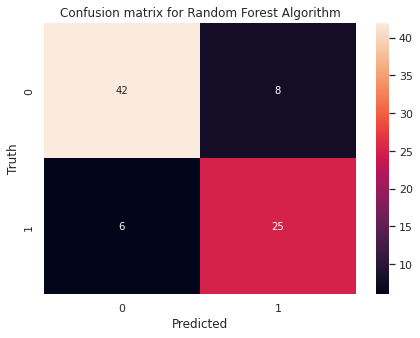

In [34]:
# #Creating the Confusion matrix  
cm_rf= confusion_matrix(y_test, ypred_rf) 

# # heatmap of confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Random Forest Algorithm")

# Random Forest using GridSearch CV

In [35]:
rfc=RandomForestClassifier(random_state=42)

In [36]:
param_grid = { 
    'n_estimators': [100,200,500,700],
#    'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth' : [3,6,8],
   'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,verbose=1)
CV_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 8],
                         'n_estimators': [100, 200, 500, 700]},
             verbose=1)

In [37]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}

In [38]:
rfc1=RandomForestClassifier(criterion = 'gini',n_estimators =300, max_depth = 4,min_samples_split = 12,min_samples_leaf = 3, max_features='auto')


In [39]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=12,
                       n_estimators=300)

In [40]:
pred=rfc1.predict(x_test)

In [41]:
print ('Classification report of Random forest with Grid Search ')
print ('------------------------------------------------------- ')
print(classification_report(y_test,pred))

Classification report of Random forest with Grid Search 
------------------------------------------------------- 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.81      0.81      0.81        31

    accuracy                           0.85        81
   macro avg       0.84      0.84      0.84        81
weighted avg       0.85      0.85      0.85        81



Text(0.5, 1.0, 'Confusion matrix for Random Forest Algorithm with GridSearch')

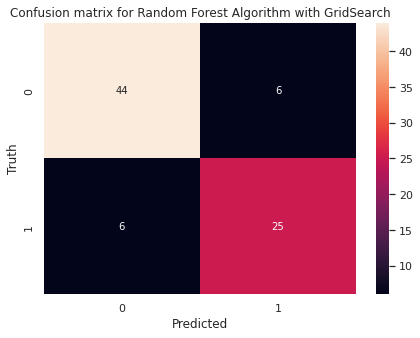

In [42]:
# #Creating the Confusion matrix  
cm_rf2= confusion_matrix(y_test, pred) 

# # heatmap of confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_rf2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for Random Forest Algorithm with GridSearch")

# ANN

In [43]:
ft = np.array(scaled) 
pt = np.array(predict)

In [44]:
# splitting training and testing dataset
from sklearn.model_selection import train_test_split
x_train_mlp,x_test_mlp,y_train_mlp,y_test_mlp = train_test_split(ft,pt,test_size=0.3,random_state=42)

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import plot_model
from keras import regularizers
from numpy import loadtxt

2022-05-13 13:06:08.009297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-13 13:06:08.009353: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [46]:
Dense_model = Sequential()
Dense_model.add(Flatten())
Dense_model.add(Dense(16,input_dim=(x_train_mlp.shape[1],1)))
Dense_model.add(Dense(8))
Dense_model.add(Dense(6))
Dense_model.add(Dense(2, activation='softmax'))

Dense_model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer='adam', metrics=['accuracy'])


2022-05-13 13:06:31.751506: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-13 13:06:31.751639: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-13 13:06:31.751711: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dp-Vostro-3580): /proc/driver/nvidia/version does not exist
2022-05-13 13:06:31.783939: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
history=Dense_model.fit(x_train_mlp, y_train_mlp, epochs=120, batch_size=5,validation_data=(x_test_mlp,y_test_mlp),shuffle=True)

Epoch 1/120
38/38 [==============================] - 3s 7ms/step - loss: 0.8031 - accuracy: 0.5767 - val_loss: 0.5709 - val_accuracy: 0.7160
Epoch 2/120
38/38 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7037 - val_loss: 0.4899 - val_accuracy: 0.8025
Epoch 3/120
38/38 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7460 - val_loss: 0.4387 - val_accuracy: 0.7901
Epoch 4/120
38/38 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7725 - val_loss: 0.4051 - val_accuracy: 0.8025
Epoch 5/120
38/38 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8042 - val_loss: 0.3787 - val_accuracy: 0.8395
Epoch 6/120
38/38 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.7989 - val_loss: 0.3686 - val_accuracy: 0.8395
Epoch 7/120
38/38 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8360 - val_loss: 0.3634 - val_accuracy: 0.8395
Epoch 8/120
3

In [48]:
pred = Dense_model.predict(x_test_mlp)

In [49]:
y_pre= np.argmax(pred,axis=1)

In [50]:
print ('                    Classification report of MLP ')
print ('                    -----------------------------')
print(classification_report(y_test_mlp,y_pre))

                    Classification report of MLP 
                    -----------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        49
           1       0.85      0.69      0.76        32

    accuracy                           0.83        81
   macro avg       0.83      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81



Text(0.5, 1.0, 'Confusion matrix for MLP Algorithm')

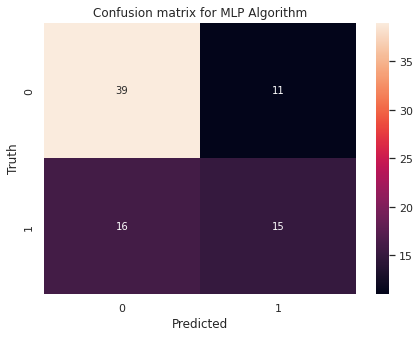

In [51]:
# #Creating the Confusion matrix  
cm_mlp= confusion_matrix(y_test, y_pre) 

# # heatmap of confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_mlp, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion matrix for MLP Algorithm")

Models accuracy and loss in kaggles's dataset


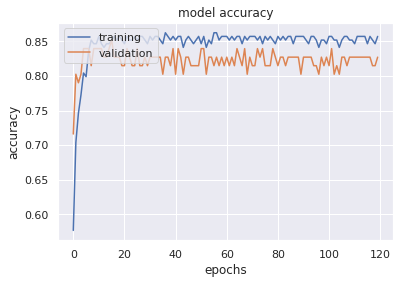

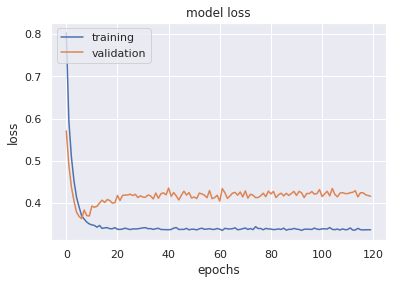

In [52]:
print("Models accuracy and loss in kaggles's dataset")
#print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
